In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading dataset
df = pd.read_csv('/content/drive/MyDrive/ELEVATE_LABS/breast-cancer.csv')
df.drop('id', axis=1, inplace=True)

In [3]:
#encoding target
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])  # M = 1, B = 0

In [4]:
#visualization (2D plot)
X_vis = df[['radius_mean', 'texture_mean']]
y = df['diagnosis']

In [5]:
#normalizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vis)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
#SVM with Linear Kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
y_pred_lin = svm_linear.predict(X_test)
print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_lin))

Linear Kernel Accuracy: 0.9035087719298246


In [7]:
#SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))

RBF Kernel Accuracy: 0.9210526315789473


In [8]:
#Hyperparameter Tuning (GridSearch)
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 0.01, 0.001]}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid.fit(X_scaled, y)
print("Best Parameters (RBF):", grid.best_params_)

Best Parameters (RBF): {'C': 0.1, 'gamma': 'scale'}


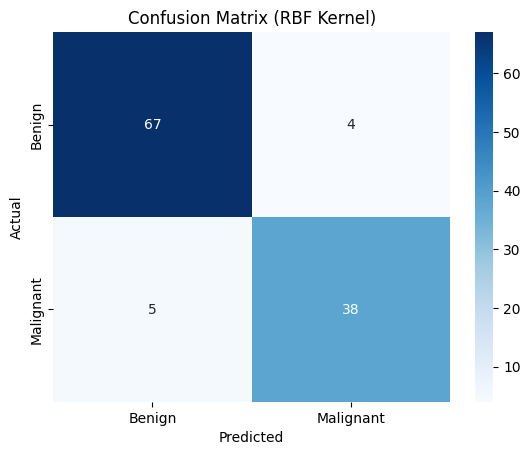

In [9]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rbf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign','Malignant'], yticklabels=['Benign','Malignant'])
plt.title('Confusion Matrix (RBF Kernel)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

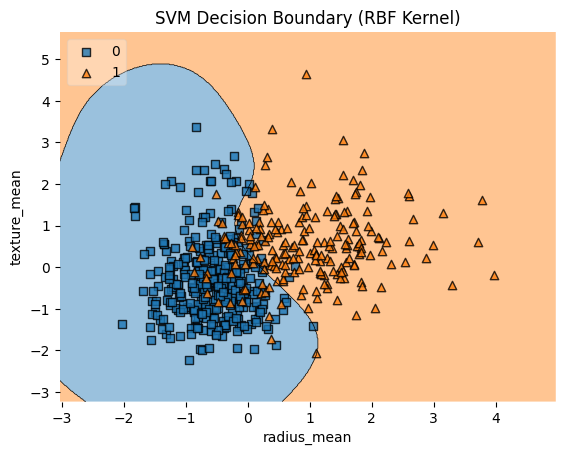

In [10]:
#Visualize Decision Boundary (RBF)
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_scaled, y.values, clf=svm_rbf, legend=2)
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.title('SVM Decision Boundary (RBF Kernel)')
plt.show()